In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
col_names = [
    'timestamp_start', 'open', 'high', 'low', 'close', 'volume', 
    'timestamp_end', 'quote_asset_volume', 'number_of_trades', 
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
]

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
btc_df = pd.read_csv('full_BTCUSDT_1m.csv')
ada_df = pd.read_csv('full_ADAUSDT_1m.csv')
bch_df = pd.read_csv('full_BCHUSDT_1m.csv')
bnb_df = pd.read_csv('full_BNBUSDT_1m.csv')
ltc_df = pd.read_csv('full_LTCUSDT_1m.csv')
near_df = pd.read_csv('full_NEARUSDT_1m.csv')
sui_df = pd.read_csv('full_SUIUSDT_1m.csv')
pepe_df = pd.read_csv('full_1000PEPEUSDT_1m.csv')
trx_df = pd.read_csv('full_TRXUSDT_1m.csv')

In [6]:
# Define dfs dictionary with your dataframes
dfs = {
    'ADA': ada_df,
    'BCH': bch_df,
    'BNB': bnb_df,
    'LTC': ltc_df,
    'NEAR': near_df,
    'SUI': sui_df,
    'PEPE': pepe_df,
    'TRX': trx_df
}


In [7]:
btc_df.columns = col_names
for symbol, df in dfs.items():
    df.columns = col_names

### Descriptive Statistics

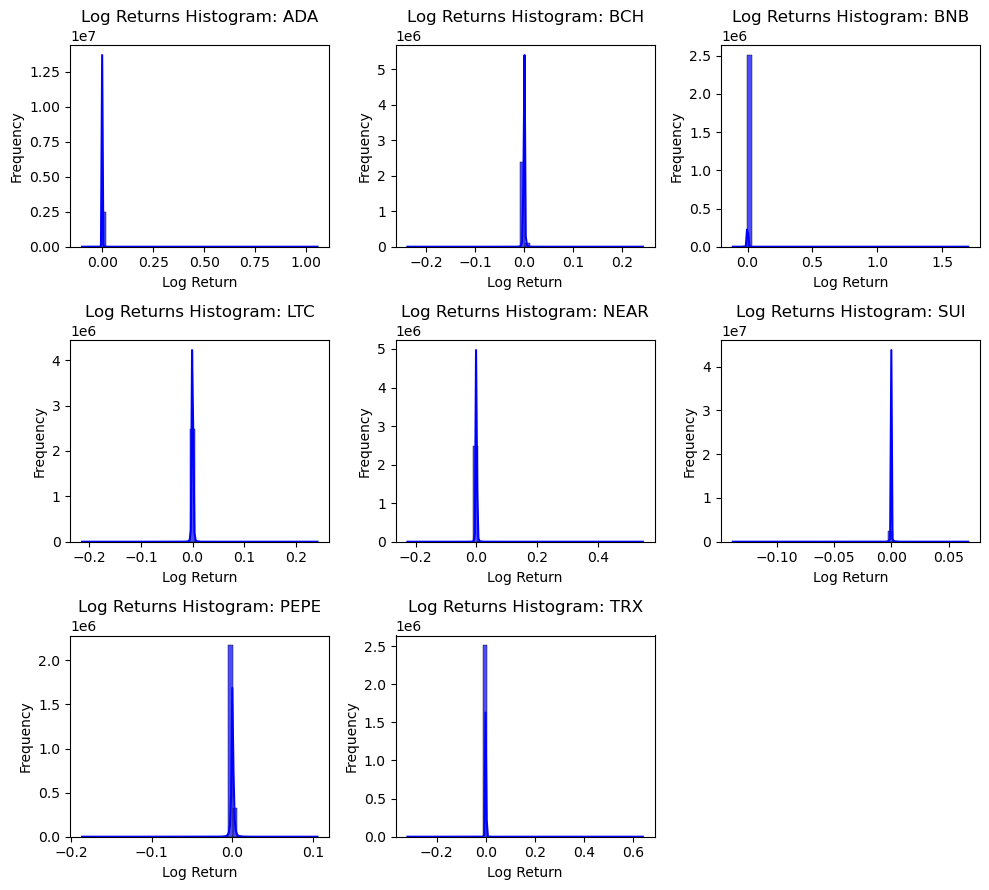

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Log Return Calculation ---
def calculate_log_returns(df):
    return np.log(df['close'] / df['close'].shift(1)).dropna()

# --- Plot Histogram for Log Returns with KDE Layer ---
def plot_log_return_histograms(dfs):
    num_plots = len(dfs)
    fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(10, 3 * ((num_plots // 3) + 1)))
    axes = axes.flatten()

    for i, (symbol, df) in enumerate(dfs.items()):
        log_returns = calculate_log_returns(df)
        sns.histplot(log_returns, bins=50, kde=True, ax=axes[i], color='blue', alpha=0.7)
        axes[i].set_title(f"Log Returns Histogram: {symbol}")
        axes[i].set_xlabel("Log Return")
        axes[i].set_ylabel("Frequency")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# --- Perform Log Return Histogram Plotting ---
plot_log_return_histograms(dfs)


In [9]:
# --- Descriptive Statistics Analysis ---
def calculate_descriptive_stats(df, symbol):
    stats = {
        'Mean': df['close'].mean(),
        'Median': df['close'].median(),
        'Variance': df['close'].var() ,
        'Standard Deviation': df['close'].std(),
        'Skewness': df['close'].skew(),
        'Kurtosis': df['close'].kurt()
    }
    return stats

# --- Perform Descriptive Statistics Analysis ---
results = []

for symbol, df in dfs.items():
    print(f"Calculating Descriptive Statistics for {symbol}...")
    stats = calculate_descriptive_stats(df, symbol)
    stats['Symbol'] = symbol
    results.append(stats)

# Convert results to DataFrame
stats_df = pd.DataFrame(results)

# Display Descriptive Statistics
stats_df

Calculating Descriptive Statistics for ADA...
Calculating Descriptive Statistics for BCH...
Calculating Descriptive Statistics for BNB...
Calculating Descriptive Statistics for LTC...
Calculating Descriptive Statistics for NEAR...
Calculating Descriptive Statistics for SUI...
Calculating Descriptive Statistics for PEPE...
Calculating Descriptive Statistics for TRX...


,Mean,Median,Variance,Standard Deviation,Skewness,Kurtosis,Symbol
0,0.815843,0.599216,0.289140,0.537718,1.250843,1.587553,ADA
1,323.853368,269.330000,37917.301178,194.723653,1.677849,5.006902,BCH
2,306.243676,301.770332,37382.648300,193.345929,-0.002634,-0.927598,BNB
3,96.605242,76.820000,2963.596475,54.438924,1.761660,3.496615,LTC
4,4.981117,4.298000,11.992898,3.463076,1.230756,1.815287,NEAR
5,2.690719,3.477400,1.394645,1.180951,-0.922121,-0.999020,SUI
6,0.015339,0.020204,0.000057,0.007527,-1.064404,-0.619016,PEPE
7,0.112419,0.093264,0.003015,0.054908,0.686409,-0.952005,TRX


### Lead Lag Analysis

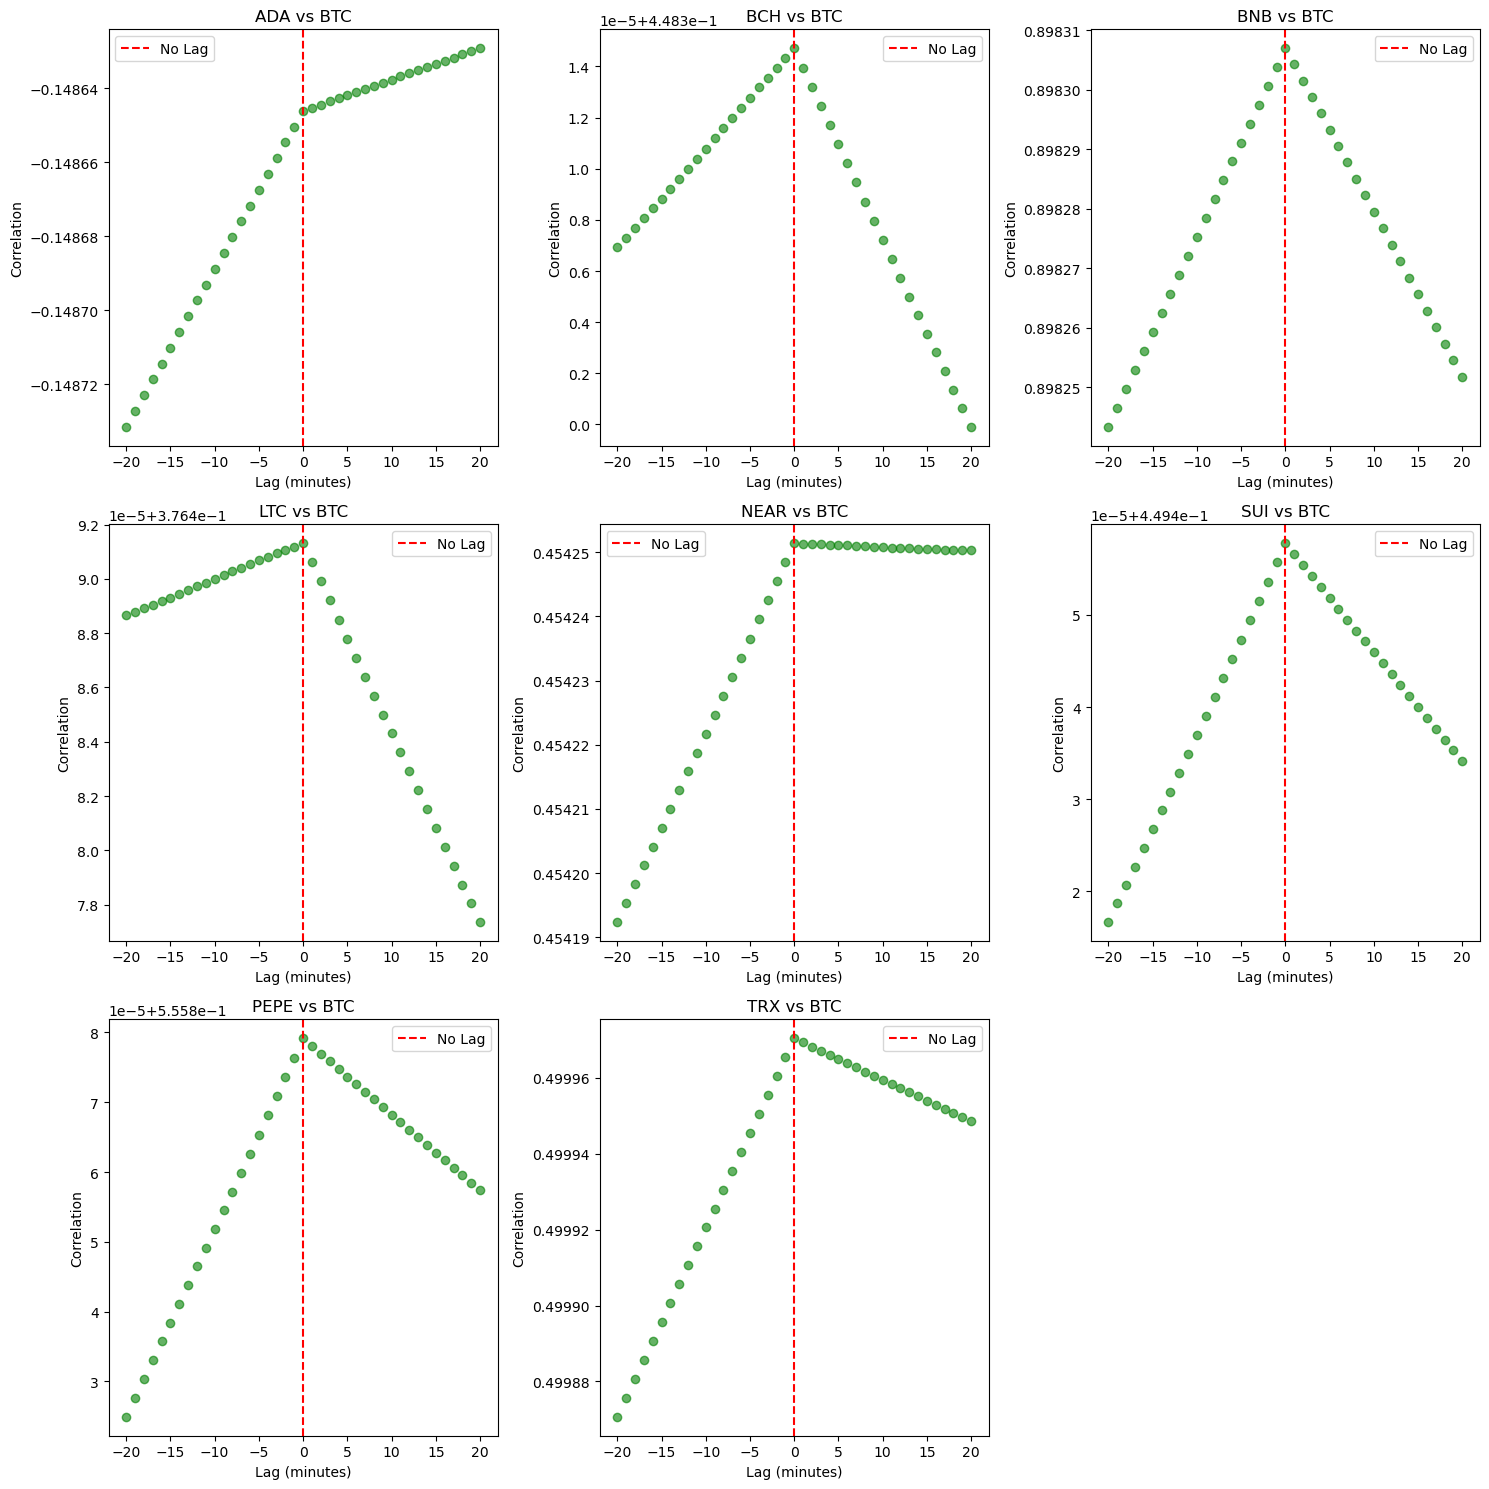

In [8]:
# Synchronize timestamps
for symbol, df in dfs.items():
    dfs[symbol] = df.reindex(btc_df.index, method='nearest')

# Updated Lead-Lag Analysis Function
def compute_lead_lag(x, y, max_lag=20):
    x, y = x[:min(len(x), len(y))], y[:min(len(x), len(y))]  # Ensure same length
    lags = np.arange(-max_lag, max_lag + 1)
    correlations = [
        np.corrcoef(np.roll(y, lag), x)[0, 1] if lag != 0 else np.corrcoef(x, y)[0, 1]
        for lag in lags
    ]
    return lags, correlations

def plot_lead_lag_scatter(base_series, all_dfs, base_name, max_lag=20):
    num_plots = len(all_dfs)
    fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, 5 * ((num_plots // 3) + 1)))
    axes = axes.flatten()

    for i, (symbol, df) in enumerate(all_dfs.items()):
        lags, correlations = compute_lead_lag(base_series, df['close'], max_lag)
        axes[i].scatter(lags, correlations, color='g', alpha=0.6)
        axes[i].axvline(0, color='red', linestyle='--', label='No Lag')
        axes[i].set_title(f"{symbol} vs {base_name}")
        axes[i].set_xlabel("Lag (minutes)")
        axes[i].set_ylabel("Correlation")
        axes[i].legend()

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Perform Lead-Lag Analysis
btc_close = btc_df['close']
plot_lead_lag_scatter(btc_close, dfs, 'BTC', max_lag=20)


In [ ]:
1+2